# SMA, WMA, SES, ARMIA 모델

## SMA,WMA,SES모델
- 실제로 사용되고 있는 모델. 머신러닝보단 약하지만 트렌드를 읽어낼 수 있는 모델로써 괜찮다

##### SMA(Simple Moving average)에서 3개의 window로 한다면 그 다음 4번째 칸에 계산값이 나온다.
- window가 많아지면 앞에 missing data가 많아지고 트렌드를 늦게 반영한다.
- moving average이므로 극단값(ex.최대값)을 제대로 쫒아가지 못한다.

##### WMA(weight Moving average)
- SMA의 2번재 단점을 보완하기 위해 최근 것을 위주로 data prediction을 한다.
- trend와 Seasonality를 반영 못해줌

##### SES(Simplt Exponential Smoothing)
- Ft+1 = Ft + a(At- Ft) ~  "지수평활법" , a = 평활지수
- Ft+1 = aAt + (1-a)Ft
- trend와 Seasonality를 반영 못해줌

##### 홀트 Expontieal Smoothing : -trend와 Seasonality를 반영 못해주는 것을 보완하기 위해 트렌드까지 반영
##### 홑르, 윈터스 E,S : Trend 와 Seasonality까지 반영

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
airline = pd.read_csv('data/airline_passengers.csv',index_col = 'Month', parse_dates = True)

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Simple Moving Average - rolling.mean()과 동일

In [4]:
airline['6M SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()
airline['12M SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

In [5]:
airline.head(10)

,Thousands of Passengers,6M SMA,12M SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


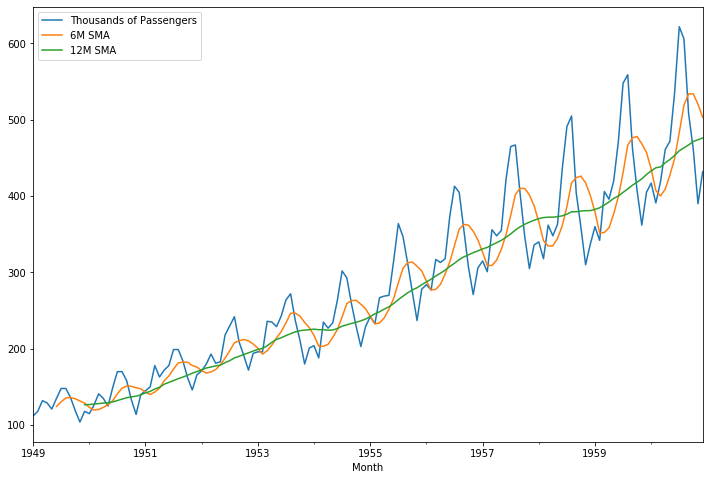

In [6]:
airline.plot(figsize=(12,8))

##### con) 
- 녹색 : 트렌드만 따라감. 주황색보다 resid가 클 때 더욱커진다.
- lagging이 발생해도 트렌드를 따라가면서 얼추 시점을 예측할 수 있는 모델이 될수 도 있다.

In [7]:
from sklearn.metrics import mean_squared_error

#residual 구하기 :
mean_squared_error(airline['Thousands of Passengers'], airline['6M SMA']) - 이렇게 하면 됨.

### Weight Moving Averagem

In [8]:
airline['WMA12'] = airline['Thousands of Passengers'].ewm(span = 12).mean()
airline['WMA6'] = airline['Thousands of Passengers'].ewm(span = 6).mean()

In [9]:
airline.head(15)

,Thousands of Passengers,6M SMA,12M SMA,WMA12,WMA6
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,115.500000
1949-03-01,132,NaN,NaN,121.787529,122.917431
1949-04-01,129,NaN,NaN,124.064224,125.266892
1949-05-01,121,NaN,NaN,123.231685,123.769332
1949-06-01,135,124.500000,NaN,126.092005,127.469517
1949-07-01,148,130.500000,NaN,130.980697,133.950151
1949-08-01,148,135.500000,NaN,134.532364,138.256171
1949-09-01,136,136.166667,NaN,134.822714,137.578764


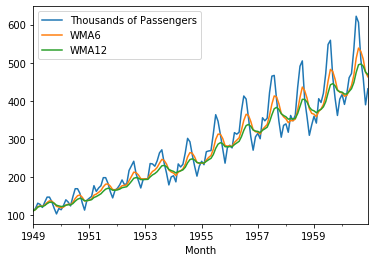

In [10]:
airline[['Thousands of Passengers','WMA6',"WMA12"]].plot()

##### con) Simple Moving average보다 뒤로 덜 밀린다 (최신 데이터를 반영하기 떄문)

### Simple Exponential Smoothing , Holt's  , Holt- Winter's

In [11]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [12]:
train = airline[:'1959']
test = airline['1960':]

In [13]:
train = train.astype('double')

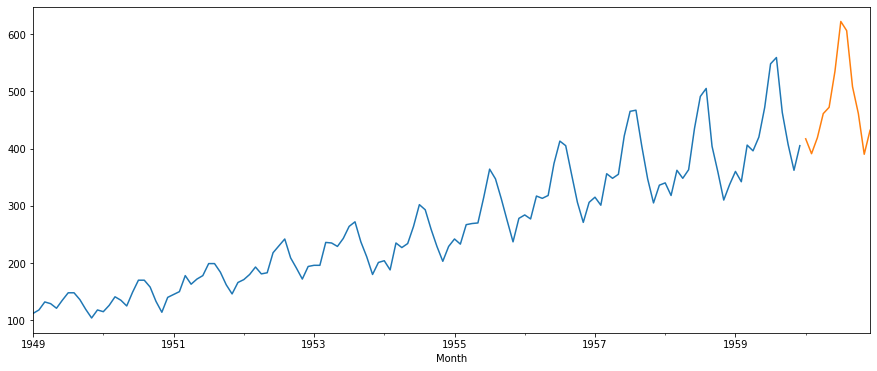

In [14]:
train['Thousands of Passengers'].plot(figsize = (15,6))
test['Thousands of Passengers'].plot()
# 예측을 수행한 다음에 test에 덮어씌워서 얼마나 잘 따라가는지 평가!

In [15]:
ses_model = SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))

In [16]:
ses_result = ses_model.fit() # fitting해야한다 => fit()붙이자!

In [17]:
y_hat = test.copy()

In [18]:
y_hat['SES']= ses_result.forecast(len(test))

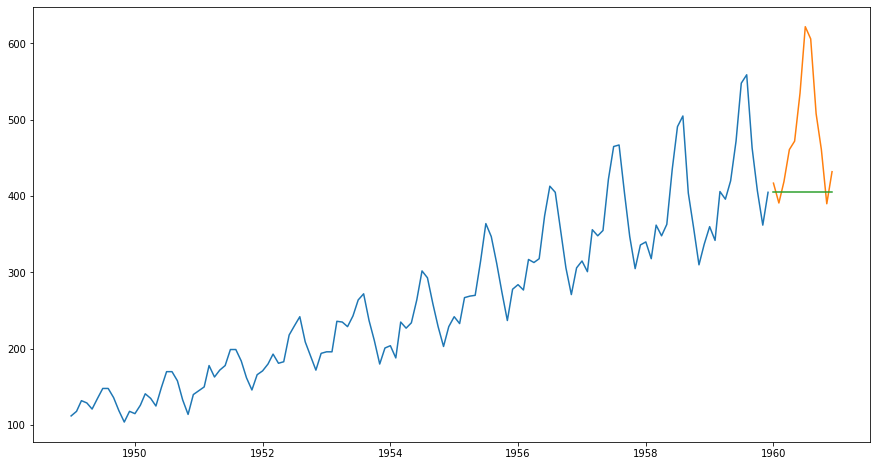

In [19]:
plt.figure(figsize = (15,8))
plt.plot(train['Thousands of Passengers'],label = "Train")
plt.plot(test['Thousands of Passengers'],label = "Test")
plt.plot(y_hat['SES'],label = "Simple Exp Smoothing") # 트렌드와 패턴이 발견되지 못했다.

In [20]:
# 성능평가! (아까 실패했던..)
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['SES']))

In [21]:
rmse

102.97653454387881

### Holt's

In [22]:
from statsmodels.tsa.api import Holt

In [23]:
holt_model = Holt(np.asarray(train['Thousands of Passengers']))

In [24]:
holt_result = holt_model.fit()

In [25]:
y_hat['HOLT'] = holt_result.forecast(len(test))

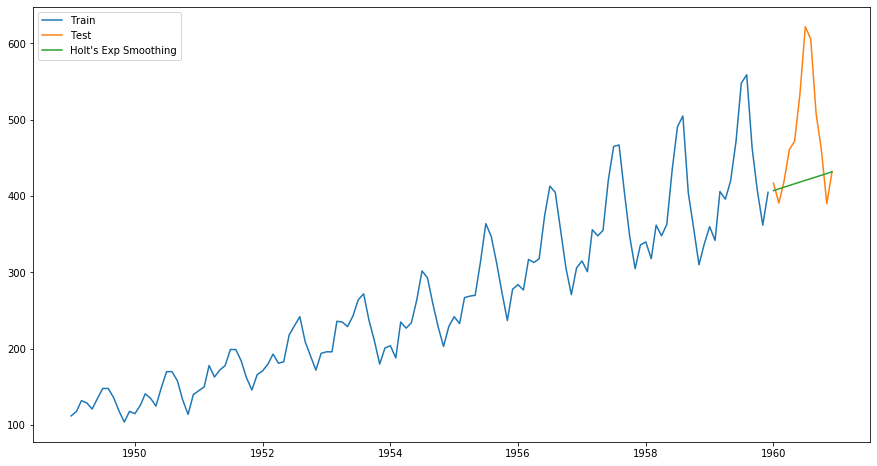

In [26]:
plt.figure(figsize = (15,8))
plt.plot(train['Thousands of Passengers'],label = "Train")
plt.plot(test['Thousands of Passengers'],label = "Test")
plt.plot(y_hat['HOLT'],label = "Holt's Exp Smoothing") # 트렌드와 패턴이 발견되지 못했다.
plt.legend()
# 트렌드를 반영하는 대신 Seasonality를 파악하지 못함.

In [27]:
# 성능평가! (아까 실패했던..)
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['HOLT']))

In [28]:
# 이전보다 성능이 좋아졌다! - 에러가 줄어들었다.
rmse

92.66652248407857

### Holt. Winter's

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing

In [30]:
winter_model = ExponentialSmoothing(
    np.asarray(train['Thousands of Passengers']),
    seasonal_periods=12, trend = 'add',seasonal = 'add'
)

In [31]:
winter_result = winter_model.fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [32]:
y_hat['WINTER'] = winter_result.forecast(len(test))

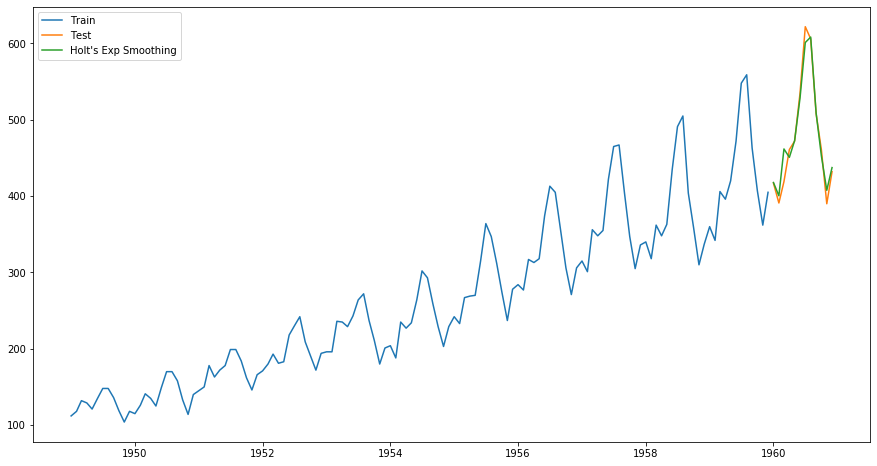

In [33]:
plt.figure(figsize = (15,8))
plt.plot(train['Thousands of Passengers'],label = "Train")
plt.plot(test['Thousands of Passengers'],label = "Test")
plt.plot(y_hat['WINTER'],label = "Holt's Exp Smoothing")
plt.legend()

In [34]:
# 성능평가! (아까 실패했던..)
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['WINTER']))

In [35]:
# 이전보다 성능이 좋아졌다! - 에러가 훨씬 줄어들었다.
rmse

15.570830479207405

## ARIMA

##### 알고리즘을 엄청 이해하며 파라미터를 구할 필요는 없다. 그릿서치라고 하이퍼파라미터를 구하는 방식으로 해당 파라미터를 구할 수있다.
##### 그래도 어느 정도는 이해하여야한다.

In [36]:
import statsmodels.api as sm

##### 파라미터가 3개 ~7개까지 들어감.
- Trend만 있을 때 :ARIMA(p,d,q) 
- Trend 있을 떄(p,d,q) + Seasonality(P,D,Q) + 한 시즌을 이루는 샘플 개수(m) : ARIMA(p,d,q)(P,D,Q,m) 

In [37]:
# SARIMAX : Seaonality + ARIMA + Extension
arima = sm.tsa.statespace.SARIMAX(
    train['Thousands of Passengers'], # Training할 데이터
    order = (2,1,1), # Trend 파라미터
    seasonal_order = (0,1,0,12),
    enforce_stationarity= False, # 에러를 막기 위해 조정한 옵션
    enforce_invertibility= False
)

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [38]:
arima_result = arima.fit() # 모델링을 위해 fitting을 한다.

In [39]:
# forecast : 예측할 데이터의 개수를 파라미터로 받는다.
# predict : 예측할 데이터의 index를 받는다.
y_hat['ARIMA']= arima_result.predict(start= '1960-01-01',end = '1960-12-01',dynamic = True) 
# dynamic의 의미 : 원래 ARIMA모델은 1스텝밖게 예측을 못함.
# 1/1데이터를 다음 예측에 계속 쓴다. forecasting한 데이터 가지고 또 forecast하는데 쓴다는 의미. ~ 잘한 방식은 아닌데..
# 여러개의 데이터를 예측하기 위해 dynamic = True라는 값을 준다.

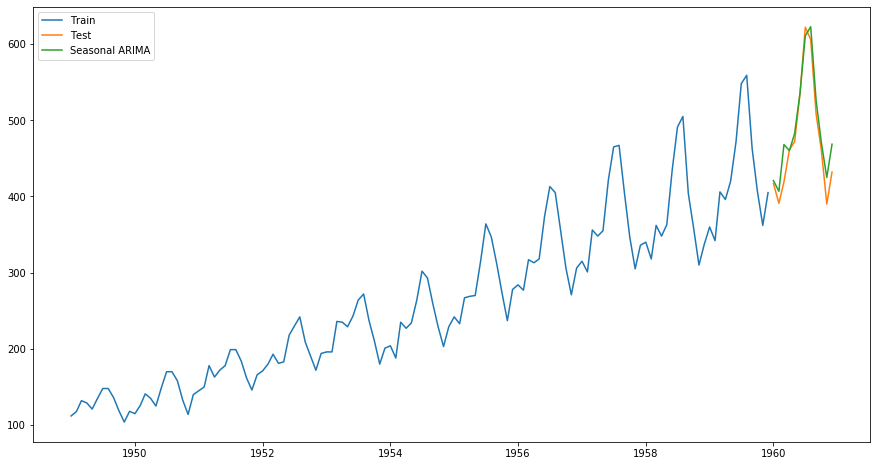

In [40]:
plt.figure(figsize = (15,8))
plt.plot(train['Thousands of Passengers'],label = "Train")
plt.plot(test['Thousands of Passengers'],label = "Test")
plt.plot(y_hat['ARIMA'],label = "Seasonal ARIMA")
plt.legend()

In [41]:
# 성능평가! (아까 실패했던..)
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['ARIMA']))

In [42]:
# 이전보다 성능이 좋아졌다! - 에러가 훨씬 줄어들었다.
rmse

22.650964283693302